#Dataset Predictive Maintanance

* Predictive maintenance adalah pendekatan yang digunakan dalam **pemeliharaan peralatan dan mesin industri** yang melibatkan penggunaan data dan analisis prediktif untuk **meramalkan kapan peralatan akan mengalami kerusakan atau kegagalan** sehingga **tindakan perawatan dapat diambil sebelum kegagalan tersebut terjadi.**
* Dataset predictive maintenance adalah kumpulan data yang digunakan untuk **melatih model prediktif** yang dapat **memprediksi kapan peralatan akan memerlukan perawatan.**
* Dataset predictive maintenance biasanya mencakup data yang mencerminkan **kondisi peralatan, informasi waktu pemeliharaan sebelumnya,** dan informasi lainnya yang dapat digunakan untuk mengembangkan model prediktif.
* Tujuan utama dari penggunaan dataset ini adalah untuk **meningkatkan efisiensi operasional dan mengurangi downtime mesin dengan melakukan perawatan yang lebih tepat waktu.**
* Dataset predictive maintenance sering digunakan dalam berbagai industri, termasuk manufaktur, perawatan fasilitas, energi, dan transportasi. Mereka membantu organisasi menghindari kerusakan yang tidak terduga dan mengoptimalkan jadwal perawatan, yang pada akhirnya dapat menghemat waktu dan biaya.

---

Source: [Kaggle Predictive Maintanance Dataset](https://www.kaggle.com/datasets/stephanmatzka/predictive-maintenance-dataset-ai4i-2020)

Publication: [S. Matzka](https://www.researchgate.net/publication/344327789_Explainable_Artificial_Intelligence_for_Predictive_Maintenance_Applications)

**Fitur-fitur pada data:**

1. UID: pengidentifikasi unik berkisar dari 1 hingga 10.000

2. productID: terdiri dari huruf L, M, atau H L (low) untuk rendah (50% dari semua produk); M (medium) sedang (30%); H (high) tinggi (20%); sebagai varian kualitas produk dan nomor seri spesifik varian. contoh: M14860

3. Type: terdiri dari huruf L, M, atau H; L (low) untuk rendah (50% dari semua produk); M (medium) sedang (30%); H (high) tinggi (20%);

3. air temperature [K]: dihasilkan menggunakan proses random walk yang kemudian dinormalisasi ke deviasi standar 2 K sekitar 300 K

4. process temperature [K]: dihasilkan dengan proses random walk yang dinormalisasi ke deviasi standar 1 K, ditambahkan ke suhu udara ditambah 10 K.

5. rotational speed [rpm]: dihitung dari daya 2860 W, ditimpa dengan noise yang terdistribusi normal.

6. torque [Nm]: nilai torsi terdistribusi normal sekitar 40 Nm dengan σ = 10 Nm dan tidak ada nilai negatif.

7. tool wear [min]: Varian kualitas H/M/L menambahkan 5/3/2 menit dari tool wear ke alat yang digunakan dalam proses.


**Target pada data:**

1. Target : Gagal atau Tidak
2. Failure Type : Tipe Kegagalan

In [35]:
import seaborn as sns
import numpy as np
from statsmodels.distributions.empirical_distribution import ECDF

Prompt: Cara menghubungkan google colab dengan google drive

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Prompt: Beri kode untuk membaca dataset dengan nama dataframe 'data'

In [2]:
import pandas as pd

# Gantilah 'nama_file.csv' dengan nama file CSV yang sesuai
nama_file = '/content/drive/MyDrive/Dataset/predictive_maintenance.csv'

# Gunakan perintah berikut untuk membaca dataset CSV
data = pd.read_csv(nama_file)

# Tampilkan beberapa baris awal dataset
data.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

Prompt: Beri kode untuk menampilkan info dataframe dengan nama dataframe "data"

In [3]:
# Jika DataFrame Anda sudah dibaca sebelumnya dan disimpan dalam variabel 'data'
# Anda dapat menampilkan informasi tentang DataFrame tersebut seperti ini:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


Prompt:

dataframe:
data = pd.read_csv(nama_file)

Nama fitur-fitur:
 0   UDI                   
 1   Product ID    
 2   Type       
 3   Air temperature [K]   
 4   Process temperature [K]
 5   Rotational speed [rpm]
 6   Torque [Nm]    
 7   Tool wear [min]  
 8   Target
 9   Failure Type  

Beri kode untuk mengetahui jumlah unique value fitur-fitur: UDI, product ID, type, target, failure type

In [4]:
# Menghitung jumlah nilai unik dalam setiap fitur
unique_counts = {
    'UDI': data['UDI'].nunique(),
    'Product ID': data['Product ID'].nunique(),
    'Type': data['Type'].nunique(),
    'Target': data['Target'].nunique(),
    'Failure Type': data['Failure Type'].nunique()
}

print("Jumlah unique value dalam fitur-fitur:")
for feature, count in unique_counts.items():
    print(f"{feature}: {count}")

Jumlah unique value dalam fitur-fitur:
UDI: 10000
Product ID: 10000
Type: 3
Target: 2
Failure Type: 6


Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk mengetahui distribusi dari fitur-fitur: type, target, failure type

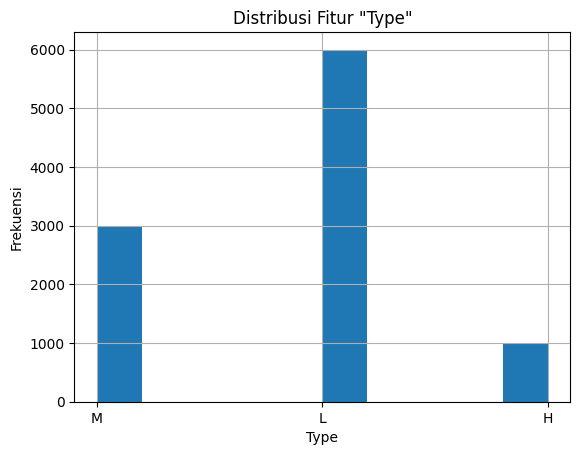

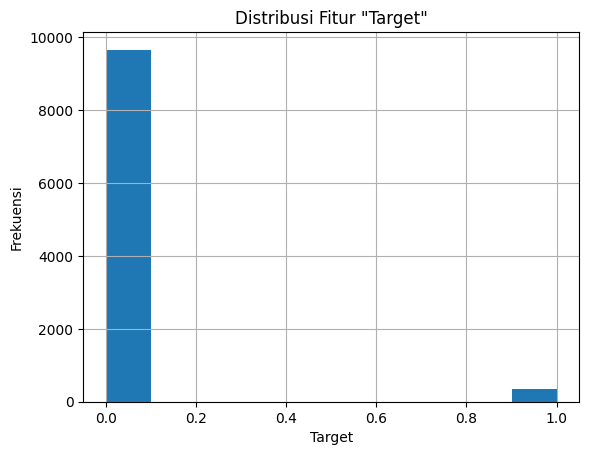

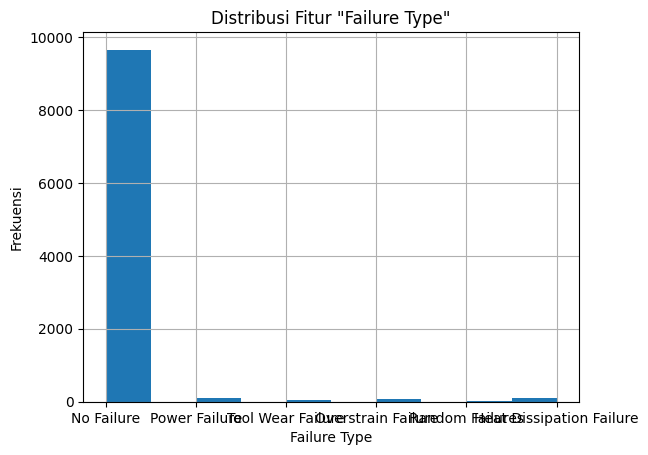

In [20]:
import matplotlib.pyplot as plt

# Menampilkan histogram untuk fitur "Type"
data['Type'].hist()
plt.title('Distribusi Fitur "Type"')
plt.xlabel('Type')
plt.ylabel('Frekuensi')
plt.show()

# Menampilkan histogram untuk fitur "Target"
data['Target'].hist()
plt.title('Distribusi Fitur "Target"')
plt.xlabel('Target')
plt.ylabel('Frekuensi')
plt.show()

# Menampilkan histogram untuk fitur "Failure Type"
data['Failure Type'].hist()
plt.title('Distribusi Fitur "Failure Type"')
plt.xlabel('Failure Type')
plt.ylabel('Frekuensi')
plt.show()

Prompt: dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk mengetahui apa saja unique value yang ada pada kolom Failure Type

In [7]:
# Mengambil unique value dari kolom "Failure Type"
unique_failure_types = data['Failure Type'].unique()

# Mencetak unique value yang ditemukan
print("Unique value pada kolom 'Failure Type':")
for value in unique_failure_types:
    print(value)

Unique value pada kolom 'Failure Type':
No Failure
Power Failure
Tool Wear Failure
Overstrain Failure
Random Failures
Heat Dissipation Failure


Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk menampilkan distribusi histogram pada kolom Failure Type hanya untuk unique value berikut:
Power Failure
Tool Wear Failure
Overstrain Failure
Random Failures
Heat Dissipation Failure

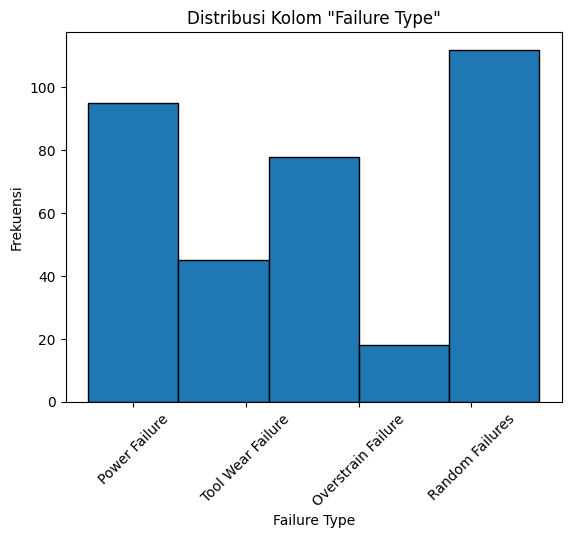

In [11]:

# Daftar unique value yang ingin Anda analisis
unique_values_to_plot = ["Power Failure", "Tool Wear Failure", "Overstrain Failure", "Random Failures", "Heat Dissipation Failure"]

# Membuat DataFrame baru yang hanya berisi baris dengan nilai "Failure Type" yang sesuai dengan daftar unique value
filtered_data = data[data['Failure Type'].isin(unique_values_to_plot)]

# Membuat histogram untuk kolom "Failure Type" yang sudah difilter
plt.hist(filtered_data['Failure Type'], bins=len(unique_values_to_plot), edgecolor='k', align='left')
plt.title('Distribusi Kolom "Failure Type"')
plt.xlabel('Failure Type')
plt.ylabel('Frekuensi')
plt.xticks(rotation=45)  # Untuk menghindari tumpang tindih label
plt.show()

Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk mengetahui distribusi dari fitur-fitur: Air temperature [K], Process temperature [K], Rotational speed [rpm] , Torque [Nm], Tool wear [min]



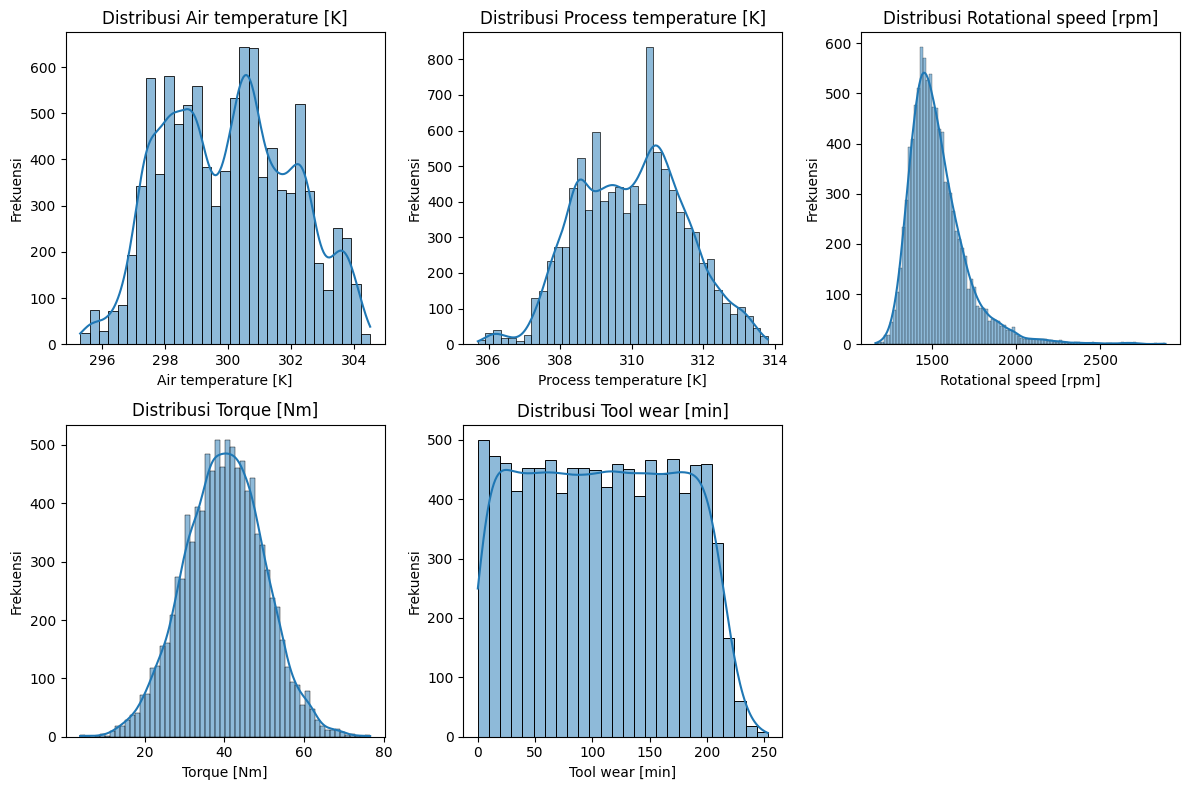

In [14]:
# Daftar fitur yang ingin Anda analisis
fitur_fitur = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Mengatur ukuran grafik
plt.figure(figsize=(12, 8))

# Loop melalui setiap fitur dan membuat subplot untuk histogram dan density plot
for i, feature in enumerate(fitur_fitur, 1):
    plt.subplot(2, 3, i)  # 2 baris, 3 kolom, subplot ke-i
    sns.histplot(data[feature], kde=True)
    plt.title(f'Distribusi {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frekuensi')

# Mengatur jarak antara subplot
plt.tight_layout()
plt.show()

Prompt:

dataframe: data = pd.read_csv(nama_file)

Beri kode untuk menampilkan pie diagram dari fitur Type dengan warna pastel

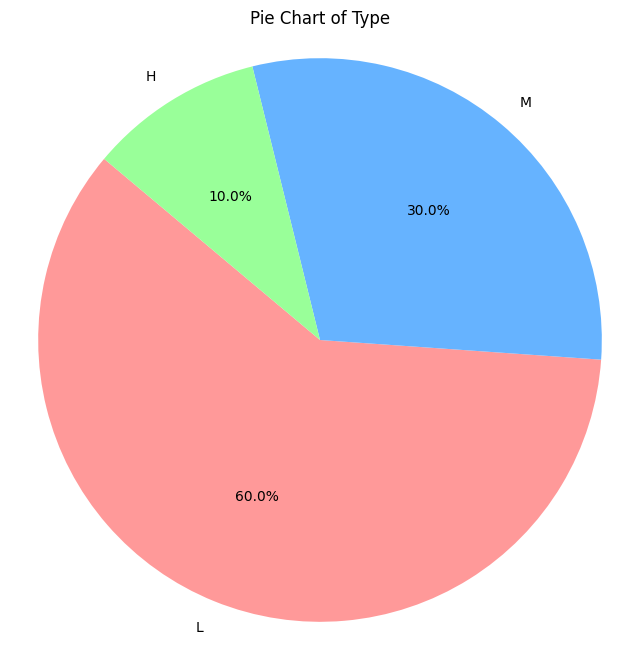

In [45]:
# Menghitung jumlah kemunculan setiap jenis "Type"
type_counts = data['Type'].value_counts()

# Warna pastel untuk pie chart
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99','#c2c2f0','#ffb3e6']

# Mengatur ukuran dan warna grafik
plt.figure(figsize=(8, 8))
plt.pie(type_counts, labels=type_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)

# Menambahkan judul
plt.title('Pie Chart of Type')

# Menampilkan pie chart
plt.axis('equal')  # Memastikan pie chart terlihat lingkaran
plt.show()

Prompt:

dataframe: data = pd.read_csv(nama_file)

Beri kode untuk menampilkan line diagram dari fitur Type

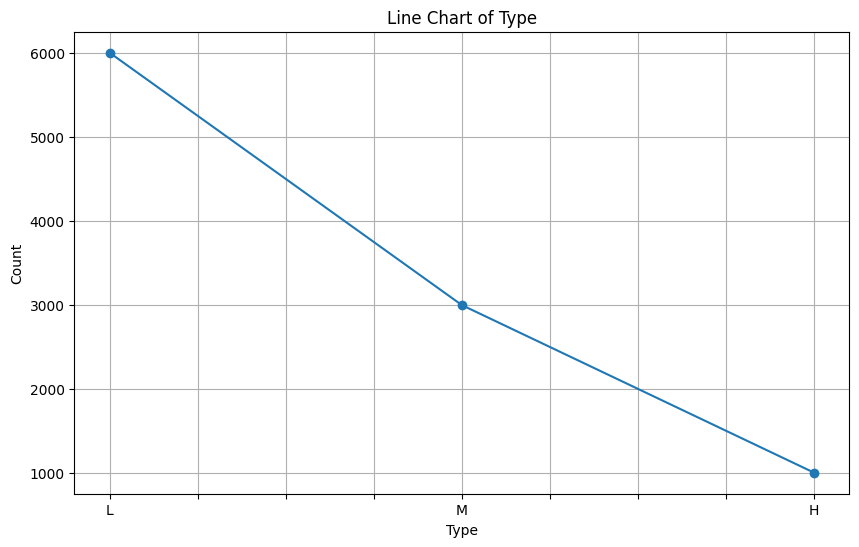

In [46]:
# Mengatur ukuran grafik
plt.figure(figsize=(10, 6))

# Membuat line chart
type_counts.plot(kind='line', marker='o')

# Menambahkan judul dan label sumbu
plt.title('Line Chart of Type')
plt.xlabel('Type')
plt.ylabel('Count')

# Menampilkan grid
plt.grid(True)

# Menampilkan line chart
plt.show()

Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk mengetahui summary statistic dari fitur-fitur: Air temperature [K], Process temperature [K], Rotational speed [rpm] , Torque [Nm], Tool wear [min]

In [17]:
# Menggunakan metode .describe() untuk mendapatkan summary statistics
summary_stats = data[fitur_fitur].describe()

# Mencetak summary statistics
print("Summary Statistic untuk Fitur-Fitur:")
summary_stats

Summary Statistic untuk Fitur-Fitur:


Air temperature [K]  Process temperature [K]  Rotational speed [rpm]  \
count         10000.000000             10000.000000            10000.000000   
mean            300.004930               310.005560             1538.776100   
std               2.000259                 1.483734              179.284096   
min             295.300000               305.700000             1168.000000   
25%             298.300000               308.800000             1423.000000   
50%             300.100000               310.100000             1503.000000   
75%             301.500000               311.100000             1612.000000   
max             304.500000               313.800000             2886.000000   

        Torque [Nm]  Tool wear [min]  
count  10000.000000     10000.000000  
mean      39.986910       107.951000  
std        9.968934        63.654147  
min        3.800000         0.000000  
25%       33.200000        53.000000  
50%       40.100000       108.000000  
75%       46.800000       162.000000  
max       76.600000       253.000000

Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk menampilkan boxplot dari fitur-fitur: Air temperature [K], Process temperature [K], Rotational speed [rpm] , Torque [Nm], Tool wear [min]

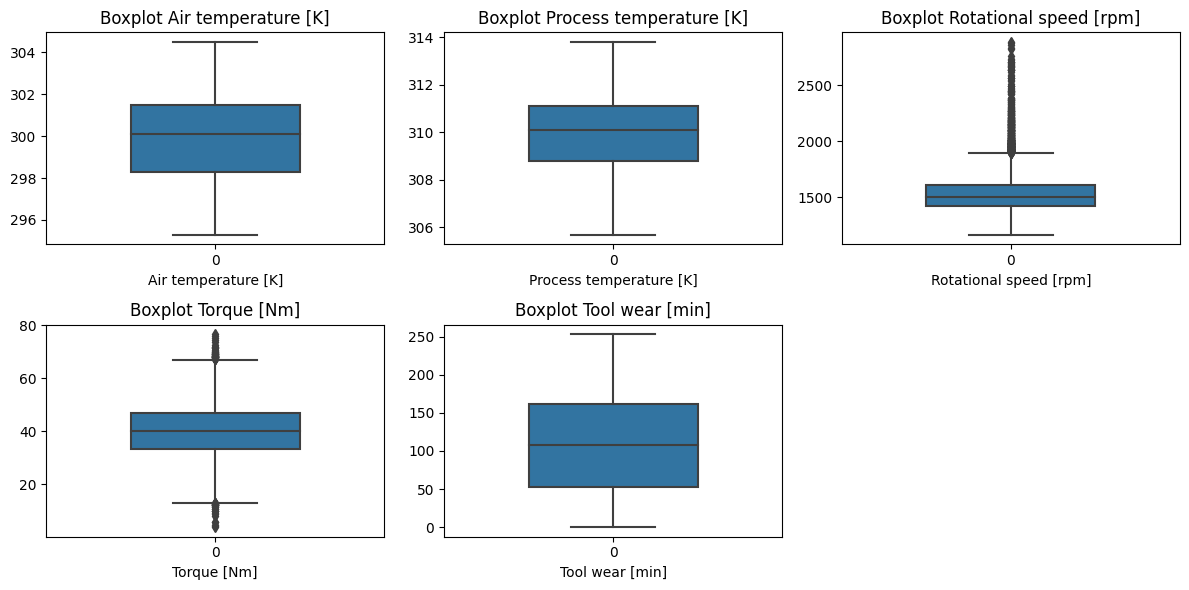

In [18]:
 # Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

# Loop melalui setiap fitur dan membuat boxplot
for i, feature in enumerate(fitur_fitur, 1):
    plt.subplot(2, 3, i)  # 2 baris, 3 kolom, subplot ke-i
    sns.boxplot(data[feature], orient='vertical', width=0.5)
    plt.title(f'Boxplot {feature}')
    plt.xlabel(feature)

# Mengatur jarak antara subplot
plt.tight_layout()
plt.show()

Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk menampilkan banyaknya outliers dari fitur-fitur: Air temperature [K], Process temperature [K], Rotational speed [rpm] , Torque [Nm], Tool wear [min]

In [19]:
# Menghitung banyaknya outliers untuk setiap fitur
outliers_counts = {}

for feature in fitur_fitur:
    Q1 = data[feature].quantile(0.25)
    Q3 = data[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[feature] < lower_bound) | (data[feature] > upper_bound)]
    outliers_counts[feature] = len(outliers)

# Mencetak banyaknya outliers
print("Banyaknya Outliers untuk Fitur-Fitur:")
for feature, count in outliers_counts.items():
    print(f"{feature}: {count}")

Banyaknya Outliers untuk Fitur-Fitur:
Air temperature [K]: 0
Process temperature [K]: 0
Rotational speed [rpm]: 418
Torque [Nm]: 69
Tool wear [min]: 0


Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk mengetahui probability mass function dari fitur-fitur: type, target, failure type dengan grafik dan tulisan besaran nilainya (dengan detail 4 angka di belakang koma) pada bar chart-nya

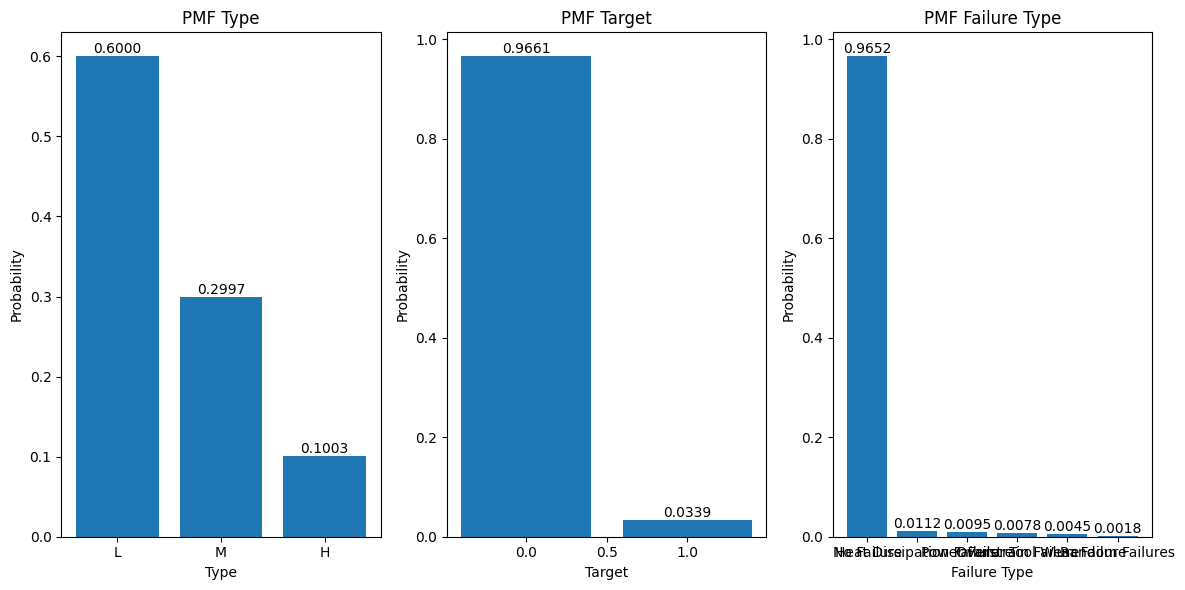

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

# Membaca file CSV ke dalam DataFrame
data = pd.read_csv(nama_file)

# Daftar fitur-fitur kategorikal yang ingin Anda analisis
fitur_kategorikal = ['Type', 'Target', 'Failure Type']

# Mengatur ukuran grafik
plt.figure(figsize=(12, 6))

for i, feature in enumerate(fitur_kategorikal, 1):
    plt.subplot(1, 3, i)  # 1 baris, 3 kolom, subplot ke-i
    pmf = data[feature].value_counts(normalize=True).reset_index()
    pmf.columns = [feature, 'Probability']

    # Menggambar bar chart
    plt.bar(pmf[feature], pmf['Probability'])

    # Menambahkan teks dengan besaran nilai (4 angka di belakang koma)
    for index, row in pmf.iterrows():
        plt.text(row[feature], row['Probability'], f'{row["Probability"]:.4f}', ha='center', va='bottom')

    plt.title(f'PMF {feature}')
    plt.xlabel(feature)
    plt.ylabel('Probability')

# Mengatur jarak antara subplot
plt.tight_layout()
plt.show()

Prompt:

dataframe:
data = pd.read_csv(nama_file)

Beri kode untuk menampilkan Cummulative Distribution Function dari fitur-fitur: Air temperature [K], Process temperature [K], Rotational speed [rpm] , Torque [Nm], Tool wear [min]

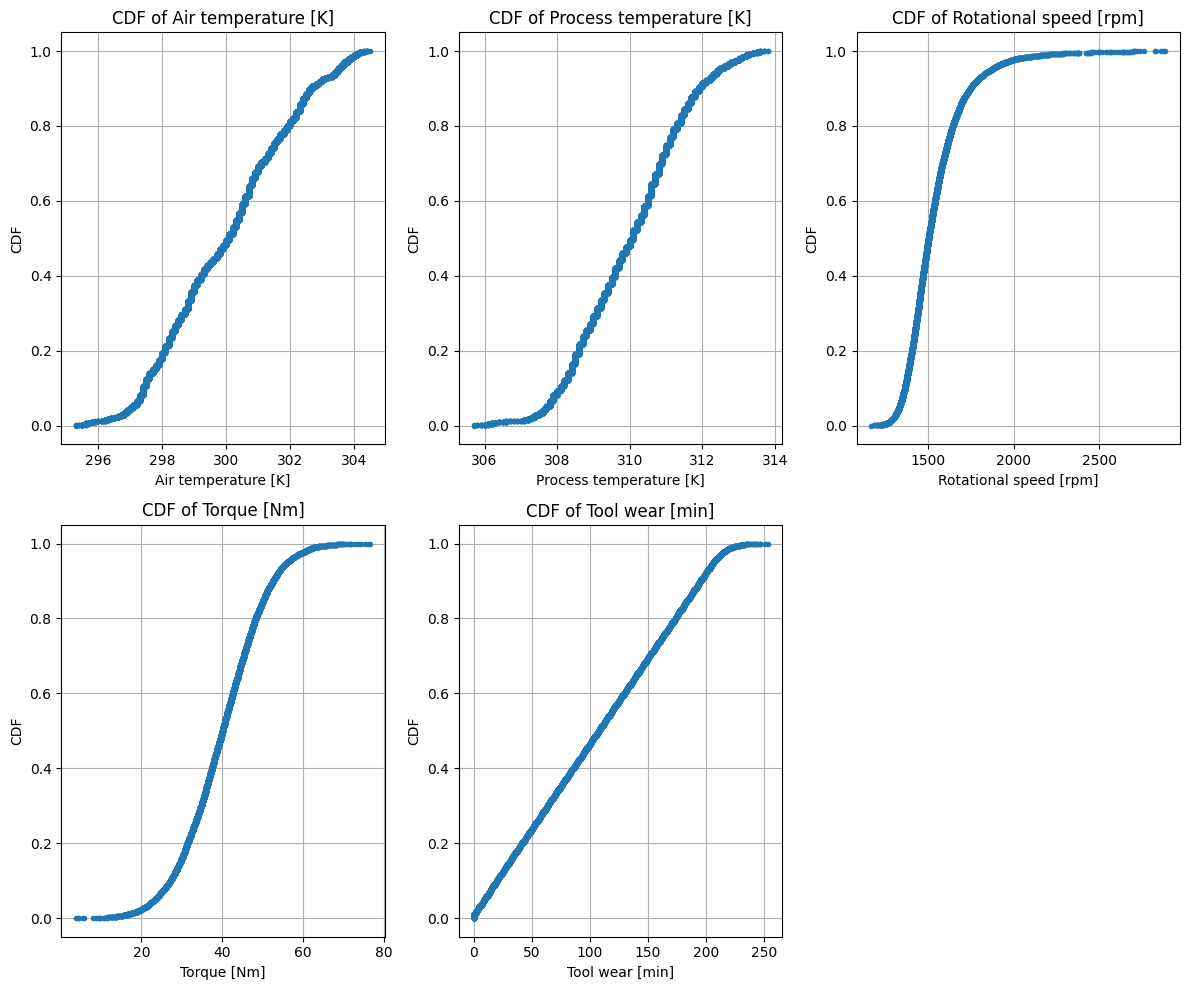

In [31]:
# Daftar fitur-fitur numerik yang ingin Anda analisis
fitur_numerik = ['Air temperature [K]', 'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]', 'Tool wear [min]']

# Mengatur ukuran grafik
plt.figure(figsize=(12, 10))

# Loop melalui setiap fitur dan membuat subplot untuk CDF
for i, feature in enumerate(fitur_numerik, 1):
    plt.subplot(2, 3, i)  # 2 baris, 3 kolom, subplot ke-i

    # Menghitung CDF
    sorted_data = np.sort(data[feature])
    cdf = np.arange(1, len(sorted_data) + 1) / len(sorted_data)

    # Membuat plot CDF
    plt.plot(sorted_data, cdf, marker='.', linestyle='none')

    plt.title(f'CDF of {feature}')
    plt.xlabel(feature)
    plt.ylabel('CDF')
    plt.grid(True)

# Mengatur jarak antara subplot
plt.tight_layout()
plt.show()